<center>
<h1> Linear Regression Case Study
</center>

#### Steps for Regression Modeling:
1. Business problem definition - One of major automobile company would like to design new product which can improve the sales. Inorder to define the product, they want to understand identify drivers for the sales(what are the factors driving sales) and Predicting sales of different car models given driving factors. 
2. convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. Data colletion(Y, X) - Identify the sources of information and collect the data
5. Consolidate the data - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. Data preparation for modeling (create data audit report to identify the steps to perform as part of data preparation)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  Lasso, Ridge, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
car_sales = pd.read_csv('Car_sales.csv')

In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [5]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [7]:
car_sales.columns

Index([u'Manufacturer', u'Model', u'Sales_in_thousands',
       u'four_year_resale_value', u'Vehicle_type', u'Price_in_thousands',
       u'Engine_size', u'Horsepower', u'Wheelbase', u'Width', u'Length',
       u'Curb_weight', u'Fuel_capacity', u'Fuel_efficiency', u'Latest_Launch',
       u'Power_perf_factor'],
      dtype='object')

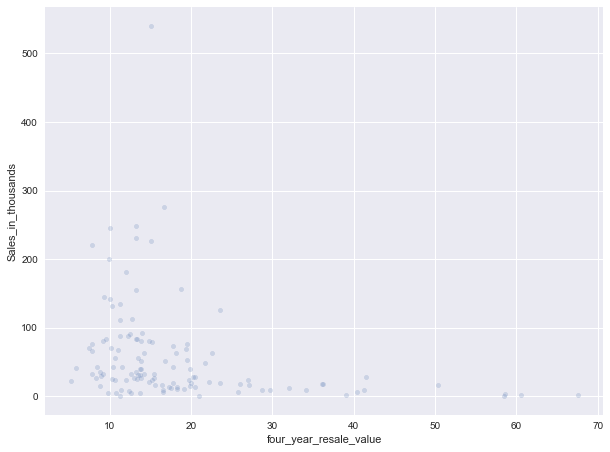

In [8]:
# Pandas scatter plot
car_sales.plot(kind='scatter', x='four_year_resale_value', y='Sales_in_thousands', alpha=0.2)

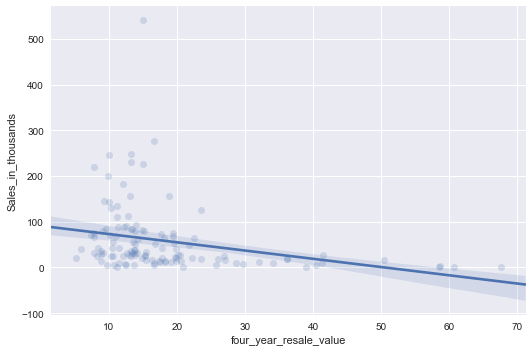

In [9]:
# Seaborn scatter plot with regression line
sns.lmplot(x='four_year_resale_value', y='Sales_in_thousands', data=car_sales, aspect=1.5, scatter_kws={'alpha':0.2})

In [10]:
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]
print numeric_var_names
print cat_var_names

['Curb_weight', 'four_year_resale_value', 'Price_in_thousands', 'Power_perf_factor', 'Engine_size', 'Fuel_efficiency', 'Fuel_capacity', 'Wheelbase', 'Width', 'Length', 'Horsepower', 'Sales_in_thousands']
['Latest_Launch', 'Model', 'Vehicle_type', 'Manufacturer']


In [11]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Curb_weight,four_year_resale_value,Price_in_thousands,Power_perf_factor,Engine_size,Fuel_efficiency,Fuel_capacity,Wheelbase,Width,Length,Horsepower,Sales_in_thousands
0,2.639,16.360,21.50,58.280150,1.8,28.0,13.2,101.2,67.3,172.4,140.0,16.919
1,3.517,19.875,28.40,91.370778,3.2,25.0,17.2,108.1,70.3,192.9,225.0,39.384
2,3.470,18.225,NaN,NaN,3.2,26.0,17.2,106.9,70.6,192.0,225.0,14.114
3,3.850,29.725,42.00,91.389779,3.5,22.0,18.0,114.6,71.4,196.6,210.0,8.588
4,2.998,22.255,23.99,62.777639,1.8,27.0,16.4,102.6,68.2,178.0,150.0,20.397


In [12]:
car_sales_num=car_sales._get_numeric_data()
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [13]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Latest_Launch,Model,Vehicle_type,Manufacturer
0,2/2/2012,Integra,Passenger,Acura
1,6/3/2011,TL,Passenger,Acura
2,1/4/2012,CL,Passenger,Acura
3,3/10/2011,RL,Passenger,Acura
4,10/8/2011,A4,Passenger,Audi


In [14]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=car_sales_num.apply(lambda x: var_summary(x)).T

In [15]:
num_summary.to_csv('num_summary.csv')

In [16]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


In [17]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [18]:
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


In [19]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [20]:
cat_summary

,Manufacturer,Model,Vehicle_type,Latest_Launch
N,157,157,157,157
NMISS,0,0,0,0
ColumnsNames,Ford 11 Dodge 11 Chevrolet ...,Neon 2 S40 1 Intrigue...,Passenger 116 Car 41 Name: Vehicl...,1/4/2012 2 4/24/2011 2 1/24/2011 ...


In [21]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Date,0
Text (Unique),0
Rejected,2
Distinct count,148


In [41]:
#Handling Outliers - Method1
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_upper(car_sales['Sales_in_thousands'].quantile(0.99)) 
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip_lower(car_sales['Sales_in_thousands'].quantile(0.01)) 


In [42]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8011.378448,51.027888,29.450000,57.397478,3294.470497,0.946643,0.950763,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,250.443296,253.560581
four_year_resale_value,157.0,0.0,2829.141298,18.020008,17.710000,9.806680,96.170969,6.173000,6.874120,8.425000,9.710000,12.545000,17.710000,18.140000,27.02500,39.275000,59.312800,60.220000
Price_in_thousands,157.0,0.0,4290.612970,27.328745,23.400000,13.973525,195.259402,10.231440,10.485434,12.491000,13.976200,18.145000,23.400000,31.930000,43.78800,55.225000,76.514312,78.479800
Engine_size,157.0,0.0,478.860064,3.050064,3.000000,0.979125,0.958686,1.555000,1.580200,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29095.622436,185.322436,180.000000,52.646914,2771.697606,96.400000,98.416000,114.600000,120.000000,150.000000,180.000000,215.000000,253.80000,300.000000,316.930000,325.750000
Wheelbase,157.0,0.0,16867.536538,107.436538,107.000000,7.400461,54.766822,92.875000,93.001000,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,132.485000,134.375000
Width,157.0,0.0,11173.619551,71.169551,70.600000,3.379455,11.420718,66.085000,66.261400,66.500000,66.900000,68.400000,70.600000,73.400000,76.18000,78.200000,79.139600,79.190000
Length,157.0,0.0,29411.272949,187.332949,187.800000,13.078230,171.040110,154.915000,156.250600,163.700000,173.120000,177.600000,187.800000,196.100000,203.34000,208.500000,217.062200,219.305000
Curb_weight,157.0,0.0,530.528485,3.379162,3.368000,0.617766,0.381634,2.245400,2.247976,2.424000,2.612800,2.975000,3.368000,3.778000,4.11740,4.388400,5.394619,5.396680
Fuel_capacity,157.0,0.0,2817.848077,17.948077,17.200000,3.807591,14.497753,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.396000,30.900000


In [43]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))

In [44]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8005.152117,50.988230,29.450000,57.257311,3278.399690,0.950763,0.952576,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,249.071690,250.443296
four_year_resale_value,157.0,0.0,2828.729138,18.017383,17.710000,9.746446,94.993200,6.874120,7.182613,8.425000,9.710000,12.545000,17.710000,18.140000,27.02500,39.275000,58.913632,59.312800
Price_in_thousands,157.0,0.0,4287.189981,27.306943,23.400000,13.878763,192.620063,10.485434,10.597191,12.491000,13.976200,18.145000,23.400000,31.930000,43.78800,55.225000,75.649497,76.514312
Engine_size,157.0,0.0,478.910464,3.050385,3.000000,0.978636,0.957728,1.580200,1.591288,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29082.014436,185.235761,180.000000,52.310464,2736.384650,98.416000,99.303040,114.600000,120.000000,150.000000,180.000000,215.000000,253.80000,300.000000,313.049200,316.930000
Wheelbase,157.0,0.0,16864.008538,107.414067,107.000000,7.311620,53.459789,93.001000,93.056440,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,131.653400,132.485000
Width,157.0,0.0,11173.871551,71.171156,70.600000,3.374579,11.387784,66.261400,66.339016,66.500000,66.900000,68.400000,70.600000,73.400000,76.18000,78.200000,79.117424,79.139600
Length,157.0,0.0,29409.458549,187.321392,187.800000,12.968366,168.178505,156.250600,156.838264,163.700000,173.120000,177.600000,187.800000,196.100000,203.34000,208.500000,216.075368,217.062200
Curb_weight,157.0,0.0,530.529515,3.379169,3.368000,0.617619,0.381453,2.247976,2.249109,2.424000,2.612800,2.975000,3.368000,3.778000,4.11740,4.388400,5.393712,5.394619
Fuel_capacity,157.0,0.0,2816.840077,17.941657,17.200000,3.785973,14.333589,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.174240,30.396000


In [45]:
#Handling Missings
# Fill with mean
car_sales['Sales_in_thousands']=car_sales['Sales_in_thousands'].fillna(car_sales['Sales_in_thousands'].mean())

In [46]:
num_summary   = car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8005.152117,50.988230,29.450000,57.257311,3278.399690,0.950763,0.952576,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,249.071690,250.443296
four_year_resale_value,157.0,0.0,2828.729138,18.017383,17.710000,9.746446,94.993200,6.874120,7.182613,8.425000,9.710000,12.545000,17.710000,18.140000,27.02500,39.275000,58.913632,59.312800
Price_in_thousands,157.0,0.0,4287.189981,27.306943,23.400000,13.878763,192.620063,10.485434,10.597191,12.491000,13.976200,18.145000,23.400000,31.930000,43.78800,55.225000,75.649497,76.514312
Engine_size,157.0,0.0,478.910464,3.050385,3.000000,0.978636,0.957728,1.580200,1.591288,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29082.014436,185.235761,180.000000,52.310464,2736.384650,98.416000,99.303040,114.600000,120.000000,150.000000,180.000000,215.000000,253.80000,300.000000,313.049200,316.930000
Wheelbase,157.0,0.0,16864.008538,107.414067,107.000000,7.311620,53.459789,93.001000,93.056440,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,131.653400,132.485000
Width,157.0,0.0,11173.871551,71.171156,70.600000,3.374579,11.387784,66.261400,66.339016,66.500000,66.900000,68.400000,70.600000,73.400000,76.18000,78.200000,79.117424,79.139600
Length,157.0,0.0,29409.458549,187.321392,187.800000,12.968366,168.178505,156.250600,156.838264,163.700000,173.120000,177.600000,187.800000,196.100000,203.34000,208.500000,216.075368,217.062200
Curb_weight,157.0,0.0,530.529515,3.379169,3.368000,0.617619,0.381453,2.247976,2.249109,2.424000,2.612800,2.975000,3.368000,3.778000,4.11740,4.388400,5.393712,5.394619
Fuel_capacity,157.0,0.0,2816.840077,17.941657,17.200000,3.785973,14.333589,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.174240,30.396000


In [47]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [48]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8005.152117,50.988230,29.450000,57.257311,3278.399690,0.950763,0.952576,1.870800,5.453600,14.114000,29.450000,67.956000,127.64160,185.336200,249.071690,250.443296
four_year_resale_value,157.0,0.0,2828.729138,18.017383,17.710000,9.746446,94.993200,6.874120,7.182613,8.425000,9.710000,12.545000,17.710000,18.140000,27.02500,39.275000,58.913632,59.312800
Price_in_thousands,157.0,0.0,4287.189981,27.306943,23.400000,13.878763,192.620063,10.485434,10.597191,12.491000,13.976200,18.145000,23.400000,31.930000,43.78800,55.225000,75.649497,76.514312
Engine_size,157.0,0.0,478.910464,3.050385,3.000000,0.978636,0.957728,1.580200,1.591288,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.760000,5.700000,5.700000
Horsepower,157.0,0.0,29082.014436,185.235761,180.000000,52.310464,2736.384650,98.416000,99.303040,114.600000,120.000000,150.000000,180.000000,215.000000,253.80000,300.000000,313.049200,316.930000
Wheelbase,157.0,0.0,16864.008538,107.414067,107.000000,7.311620,53.459789,93.001000,93.056440,95.920000,98.700000,103.000000,107.000000,112.200000,115.46000,119.200000,131.653400,132.485000
Width,157.0,0.0,11173.871551,71.171156,70.600000,3.374579,11.387784,66.261400,66.339016,66.500000,66.900000,68.400000,70.600000,73.400000,76.18000,78.200000,79.117424,79.139600
Length,157.0,0.0,29409.458549,187.321392,187.800000,12.968366,168.178505,156.250600,156.838264,163.700000,173.120000,177.600000,187.800000,196.100000,203.34000,208.500000,216.075368,217.062200
Curb_weight,157.0,0.0,530.529515,3.379169,3.368000,0.617619,0.381453,2.247976,2.249109,2.424000,2.612800,2.975000,3.368000,3.778000,4.11740,4.388400,5.393712,5.394619
Fuel_capacity,157.0,0.0,2816.840077,17.941657,17.200000,3.785973,14.333589,11.900000,11.900000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,30.174240,30.396000


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [30]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [54]:
col_dummies=pd.get_dummies(car_sales['Manufacturer'], prefix='d')
col_dummies.head(5)

,d_Acura,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
col_dummies.columns[0]

'd_Acura'

In [56]:
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)

In [57]:
col_dummies.head(5)

,d_Audi,d_BMW,d_Buick,d_Cadillac,d_Chevrolet,d_Chrysler,d_Dodge,d_Ford,d_Honda,d_Hyundai,...,d_Oldsmobile,d_Plymouth,d_Pontiac,d_Porsche,d_Saab,d_Saturn,d_Subaru,d_Toyota,d_Volkswagen,d_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([car_sales_cat, col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [32]:
car_sales_cat.head(5)

,Vehicle_type_Passenger
0,1
1,1
2,1
3,1
4,1


In [58]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [59]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [60]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [61]:
car_sales_cat.head(5)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

In [63]:
car_sales_new.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


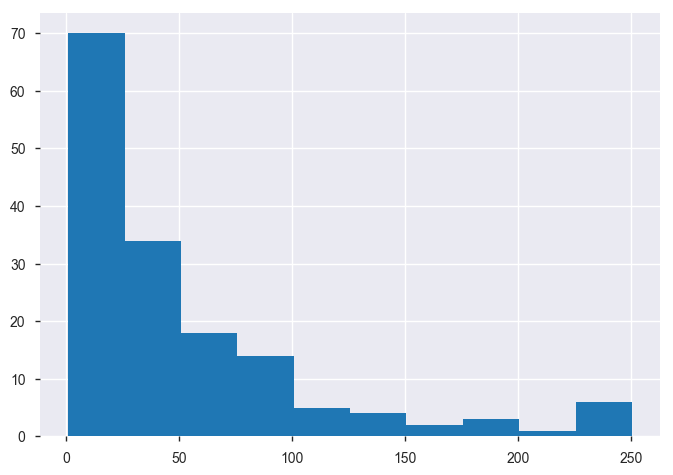

In [64]:
car_sales_new.Sales_in_thousands.hist()

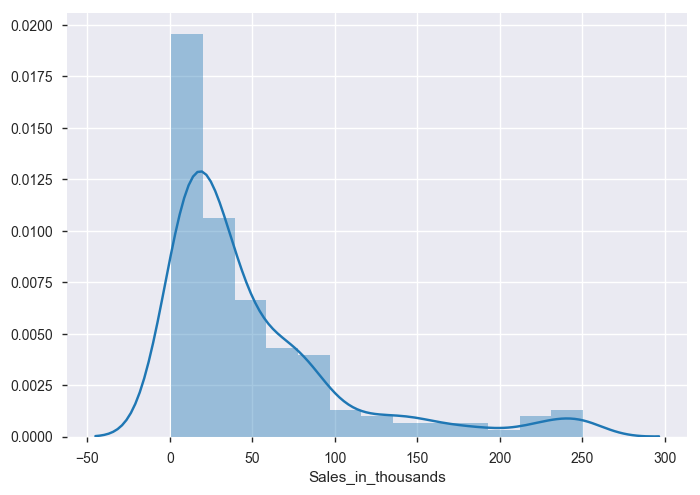

In [65]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

In [118]:
np.log?

In [66]:
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)

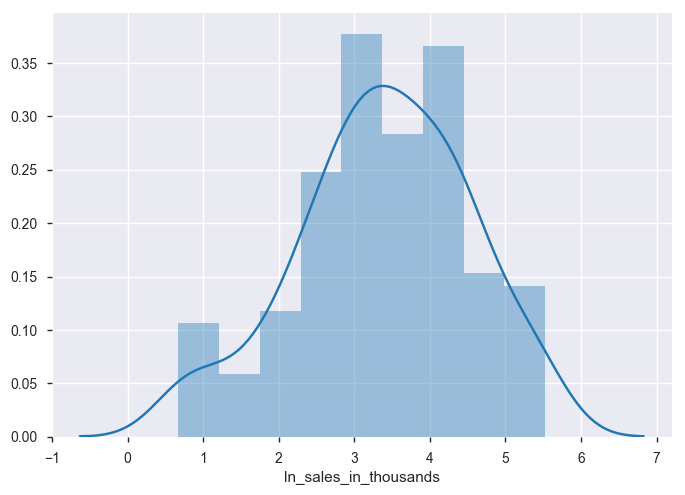

In [67]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [ ]:
#Dropping the variables
car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [68]:
car_sales_new.columns

Index([u'Sales_in_thousands', u'four_year_resale_value', u'Price_in_thousands',
       u'Engine_size', u'Horsepower', u'Wheelbase', u'Width', u'Length',
       u'Curb_weight', u'Fuel_capacity', u'Fuel_efficiency',
       u'Power_perf_factor', u'Manufacturer_Audi', u'Manufacturer_BMW',
       u'Manufacturer_Buick', u'Manufacturer_Cadillac',
       u'Manufacturer_Chevrolet', u'Manufacturer_Chrysler',
       u'Manufacturer_Dodge', u'Manufacturer_Ford', u'Manufacturer_Honda',
       u'Manufacturer_Hyundai', u'Manufacturer_Infiniti',
       u'Manufacturer_Jaguar', u'Manufacturer_Jeep', u'Manufacturer_Lexus',
       u'Manufacturer_Lincoln', u'Manufacturer_Mercedes-B',
       u'Manufacturer_Mercury', u'Manufacturer_Mitsubishi',
       u'Manufacturer_Nissan', u'Manufacturer_Oldsmobile',
       u'Manufacturer_Plymouth', u'Manufacturer_Pontiac',
       u'Manufacturer_Porsche', u'Manufacturer_Saab', u'Manufacturer_Saturn',
       u'Manufacturer_Subaru', u'Manufacturer_Toyota',
       u'Manufactur

In [70]:
# correlation matrix (ranges from 1 to -1)
corrm=car_sales_new.corr()

In [72]:
corrm.to_csv('corrm.csv')

In [ ]:
car_sales_new.corr()

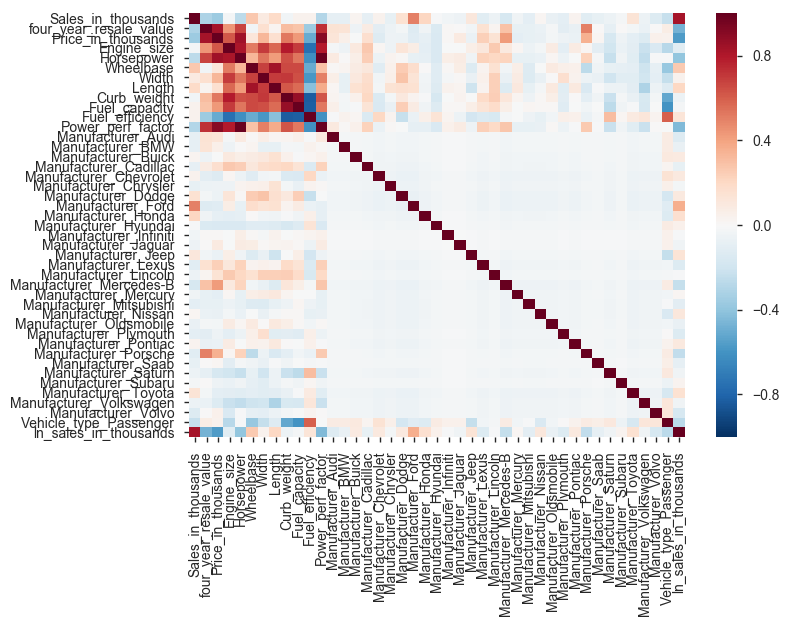

In [73]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

#### What relationships do you notice?

In [74]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] )
feature_columns

Index([u'Curb_weight', u'Engine_size', u'Fuel_capacity', u'Fuel_efficiency',
       u'Horsepower', u'Length', u'Manufacturer_Audi', u'Manufacturer_BMW',
       u'Manufacturer_Buick', u'Manufacturer_Cadillac',
       u'Manufacturer_Chevrolet', u'Manufacturer_Chrysler',
       u'Manufacturer_Dodge', u'Manufacturer_Ford', u'Manufacturer_Honda',
       u'Manufacturer_Hyundai', u'Manufacturer_Infiniti',
       u'Manufacturer_Jaguar', u'Manufacturer_Jeep', u'Manufacturer_Lexus',
       u'Manufacturer_Lincoln', u'Manufacturer_Mercedes-B',
       u'Manufacturer_Mercury', u'Manufacturer_Mitsubishi',
       u'Manufacturer_Nissan', u'Manufacturer_Oldsmobile',
       u'Manufacturer_Plymouth', u'Manufacturer_Pontiac',
       u'Manufacturer_Porsche', u'Manufacturer_Saab', u'Manufacturer_Saturn',
       u'Manufacturer_Subaru', u'Manufacturer_Toyota',
       u'Manufacturer_Volkswagen', u'Manufacturer_Volvo', u'Power_perf_factor',
       u'Price_in_thousands', u'Vehicle_type_Passenger', u'Wheelbase',
 

In [151]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [152]:
print len( train_X )
print len( test_X)

109
48


In [77]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split( car_sales_new,test_size = 0.3,random_state = 123 )

In [79]:
len(test)

48

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

## Method-1

In [80]:
import statsmodels.api as sm

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [81]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [82]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.784
Model:                               OLS   Adj. R-squared:                  0.662
Method:                    Least Squares   F-statistic:                     6.423
Date:                   Sun, 17 Dec 2017   Prob (F-statistic):           1.25e-11
Time:                           11:11:06   Log-Likelihood:                -88.785
No. Observations:                    109   AIC:                             257.6
Df Residuals:                         69   BIC:                             365.2
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [83]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

('Parameters: ', const                     -6.474117e+00
Curb_weight                6.960504e-01
Engine_size                2.694366e-01
Fuel_capacity             -1.307196e-01
Fuel_efficiency            1.451963e-01
Horsepower                -1.175135e-02
Length                     7.130158e-03
Manufacturer_Audi         -1.542600e-01
Manufacturer_BMW           2.160840e-01
Manufacturer_Buick         6.174540e-01
Manufacturer_Cadillac      5.221467e-01
Manufacturer_Chevrolet     2.953248e-01
Manufacturer_Chrysler     -2.278200e-01
Manufacturer_Dodge         1.017140e+00
Manufacturer_Ford          1.455569e+00
Manufacturer_Honda         1.773301e+00
Manufacturer_Hyundai       8.211981e-01
Manufacturer_Infiniti      1.869424e-15
Manufacturer_Jaguar        8.171877e-01
Manufacturer_Jeep          2.300862e+00
Manufacturer_Lexus         7.045954e-01
Manufacturer_Lincoln       6.431587e-01
Manufacturer_Mercedes-B    5.237009e-01
Manufacturer_Mercury       1.768834e-01
Manufacturer_Mitsubishi

In [86]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y, y_pred)
print 'MSE:', metrics.mean_squared_error(test_y, y_pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred))
print 'R-squre:', metrics.r2_score(test_y, y_pred)

MAE: 0.728017827452
MSE: 0.807941008025
RMSE: 0.898855387715
R-squre: 0.269382746552


## Method-2

In [87]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(car_sales_new,test_size=0.3,random_state = 123 ) 

In [88]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index([u'Sales_in_thousands', u'four_year_resale_value', u'Price_in_thousands',
       u'Engine_size', u'Horsepower', u'Wheelbase', u'Width', u'Length',
       u'Curb_weight', u'Fuel_capacity', u'Fuel_efficiency',
       u'Power_perf_factor', u'Manufacturer_Audi', u'Manufacturer_BMW',
       u'Manufacturer_Buick', u'Manufacturer_Cadillac',
       u'Manufacturer_Chevrolet', u'Manufacturer_Chrysler',
       u'Manufacturer_Dodge', u'Manufacturer_Ford', u'Manufacturer_Honda',
       u'Manufacturer_Hyundai', u'Manufacturer_Infiniti',
       u'Manufacturer_Jaguar', u'Manufacturer_Jeep', u'Manufacturer_Lexus',
       u'Manufacturer_Lincoln', u'Manufacturer_MercedesB',
       u'Manufacturer_Mercury', u'Manufacturer_Mitsubishi',
       u'Manufacturer_Nissan', u'Manufacturer_Oldsmobile',
       u'Manufacturer_Plymouth', u'Manufacturer_Pontiac',
       u'Manufacturer_Porsche', u'Manufacturer_Saab', u'Manufacturer_Saturn',
       u'Manufacturer_Subaru', u'Manufacturer_Toyota',
       u'Manufacture

In [89]:
import statsmodels.formula.api as smf

lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.594
Model:                               OLS   Adj. R-squared:                  0.548
Method:                    Least Squares   F-statistic:                     12.88
Date:                   Sun, 17 Dec 2017   Prob (F-statistic):           1.04e-14
Time:                           11:37:24   Log-Likelihood:                -123.24
No. Observations:                    109   AIC:                             270.5
Df Residuals:                         97   BIC:                             302.8
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.5643      2.658     -1.341      0.183      -8.840       1.711
Price_in_thousands        -0.0519      0.016     -3.215      0.002      -0.084      -0.020
four_year_resale_value     0.0184      0.015      1.249      0.215      -0.011       0.048
Engine_size                0.4047      0.191      2.123      0.036       0.026       0.783
Curb_weight               -0.1195      0.349     -0.342      0.733      -0.813       0.574
Wheelbase                  0.0307      0.023      1.338      0.184      -0.015       0.076
Width                      0.0168      0.042      0.404      0.687      -0.066       0.099
Length                     0.0162      0.014      1.175      0.243      -0.011       0.044
Horsepower                -0.0045      0.004     -1.072      0.286      -0.013       0.004
Fuel_capacity             -0.0403      0.054     -0.752      0.454      -0.147       0.066
Fuel_efficiency            0.0858      0.044      1.938      0.056      -0.002       0.174
Vehicle_type_Passenger    -0.9483      0.334     -2.842      0.005      -1.610      -0.286
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.969
Skew:                          -0.309   Prob(JB):                        0.374
Kurtosis:                       3.228   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] ))

print all_columns



Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [92]:
my_formula = "ln_sales_in_thousands~" + all_columns

print my_formula

ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [93]:
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()
#lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [94]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.784
Model:                               OLS   Adj. R-squared:                  0.662
Method:                    Least Squares   F-statistic:                     6.423
Date:                   Sun, 17 Dec 2017   Prob (F-statistic):           1.25e-11
Time:                           11:39:56   Log-Likelihood:                -88.785
No. Observations:                    109   AIC:                             257.6
Df Residuals:                         69   BIC:                             365.2
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.4741      3.099     -2.089      0.040     -12.657      -0.291
Curb_weight                 0.6961      0.396      1.758      0.083      -0.094       1.486
Engine_size                 0.2694      0.239      1.127      0.263      -0.207       0.746
Fuel_capacity              -0.1307      0.059     -2.217      0.030      -0.248      -0.013
Fuel_efficiency             0.1452      0.054      2.672      0.009       0.037       0.254
Horsepower                 -0.0118      0.021     -0.552      0.583      -0.054       0.031
Length                      0.0071      0.019      0.366      0.715      -0.032       0.046
Manufacturer_Audi          -0.1543      0.909     -0.170      0.866      -1.968       1.659
Manufacturer_BMW            0.2161      0.879      0.246      0.806      -1.537       1.969
Manufacturer_Buick          0.6175      0.662      0.932      0.354      -0.704       1.939
Manufacturer_Cadillac       0.5221      0.617      0.846      0.400      -0.709       1.753
Manufacturer_Chevrolet      0.2953      0.643      0.459      0.647      -0.987       1.578
Manufacturer_Chrysler      -0.2278      0.683     -0.333      0.740      -1.591       1.136
Manufacturer_Dodge          1.0171      0.651      1.561      0.123      -0.282       2.317
Manufacturer_Ford           1.4556      0.613      2.374      0.020       0.233       2.679
Manufacturer_Honda          1.7733      0.749      2.368      0.021       0.280       3.267
Manufacturer_Hyundai        0.8212      0.752      1.092      0.279      -0.679       2.321
Manufacturer_Infiniti    1.869e-15   1.88e-15      0.992      0.325   -1.89e-15    5.63e-15
Manufacturer_Jaguar         0.8172      0.907      0.901      0.371      -0.992       2.627
Manufacturer_Jeep           2.3009      0.804      2.863      0.006       0.698       3.904
Manufacturer_Lexus          0.7046      0.625      1.127      0.264      -0.543       1.952
Manufacturer_Lincoln        0.6432      0.686      0.937      0.352      -0.726       2.012
Manufacturer_MercedesB      0.5237      0.591      0.887      0.378      -0.655       1.702
Manufacturer_Mercury        0.1769      0.720      0.246      0.807      -1.260       1.614
Manufacturer_Mitsubishi     0.3750      0.632      0.594      0.555      -0.885       1.635
Manufacturer_Nissan         1.3513      0.639      2.115      0.038       0.077       2.626
Manufacturer_Oldsmobile    -0.0813      0.626     -0.130      0.897      -1.330       1.167
Manufacturer_Plymouth      -0.9851      1.243     -0.793      0.431      -3.464       1.494
Manufacturer_Pontiac        0.4876      0.631      0.773      0.442      -0.771       1.746
Manufacturer_Porsche        1.4452      0.860      1.681      0.097      -0.270       3.160
Manufacturer_S

In [109]:
lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+Wheelbase+Manufacturer_Ford+Vehicle_type_Passenger', train).fit()

In [110]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.588
Model:                               OLS   Adj. R-squared:                  0.573
Method:                    Least Squares   F-statistic:                     37.16
Date:                   Sun, 17 Dec 2017   Prob (F-statistic):           2.85e-19
Time:                           11:49:22   Log-Likelihood:                -123.94
No. Observations:                    109   AIC:                             257.9
Df Residuals:                        104   BIC:                             271.3
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3066      1.167      0.263      0.793      -2.007       2.620
Price_in_thousands        -0.0533      0.006     -9.501      0.000      -0.064      -0.042
Wheelbase                  0.0448      0.011      4.221      0.000       0.024       0.066
Manufacturer_Ford          0.9159      0.264      3.470      0.001       0.393       1.439
Vehicle_type_Passenger    -0.3588      0.180     -1.997      0.048      -0.715      -0.003
==============================================================================
Omnibus:                        3.396   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.842
Skew:                          -0.378   Prob(JB):                        0.241
Kurtosis:                       3.236   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
test.head(5)

In [ ]:
test.columns

In [ ]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

In [111]:
pred = lm.predict(test)
pred.head(5)

24     2.193908
23     3.179706
138    3.384272
87     3.832605
134    3.374836
dtype: float64

In [112]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, pred)
print 'MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, pred))
print 'R-Squre:', metrics.r2_score(test.ln_sales_in_thousands, pred)

MAE: 0.733455938229
MSE: 0.89815796642
RMSE: 0.947711963848
R-Squre: 0.187799975406


In [115]:
pred = lm.predict(train)
pred_sales = np.exp(pred)-1
pred.head(5)

45     4.339367
129    3.965325
79     3.610260
153    3.181588
35     3.977644
dtype: float64

In [116]:
pred_sales.head(5)

45     75.659028
129    51.737391
79     35.975675
153    23.084964
35     52.391119
dtype: float64

In [117]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, pred)
print 'MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, pred))
print 'R-Squre:', metrics.r2_score(train.ln_sales_in_thousands, pred)
print 'R-Squre:', metrics.r2_score(train.Sales_in_thousands, pred_sales)

MAE: 0.582126022928
MSE: 0.569068013634
RMSE: 0.754365967972
R-Squre: 0.588352073517
R-Squre: 0.405711062824


## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> - R-squared = Explained variation / Total variation <br>
> - Total variation is variation of response variable around it's mean. <br>

> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. <br>

## Other Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
import statsmodels as sm

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [120]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_sales_in_thousands~Price_in_thousands+Wheelbase+Manufacturer_Ford+Vehicle_type_Passenger', train, return_type='dataframe')

In [121]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [122]:
vif.round(1)

,VIF Factor,features
0,248.8,Intercept
1,1.1,Price_in_thousands
2,1.3,Wheelbase
3,1.1,Manufacturer_Ford
4,1.2,Vehicle_type_Passenger


In [ ]:
X.head(5)

In [ ]:
lm1=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Vehicle_type_Passenger', train).fit()

In [ ]:
lm1.summary()

In [ ]:
train['y_pred_train'] = lm1.predict(train)

In [ ]:
train.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, train.y_pred_train)
print 'MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, train.y_pred_train))

In [ ]:
test['y_pred_test'] = lm1.predict(test)

In [ ]:
test.head(5)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, test.y_pred_test)
print 'MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, test.y_pred_test))

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [ ]:
train['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

In [ ]:
train.head(5)

In [ ]:
test.head(5)

In [ ]:
train[['Deciles','ln_sales_in_thousands', 'y_pred_train']].groupby(train.Deciles).mean()

In [ ]:
test[['Deciles','ln_sales_in_thousands', 'y_pred_test']].groupby(test.Deciles).mean()

In [ ]:
sns.distplot(lm1.resid)

In [ ]:
sns.jointplot(car_sales_new.ln_sales_in_thousands, lm1.predict(car_sales_new) )

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [135]:
train_X

,const,Curb_weight,Engine_size,Fuel_capacity,Fuel_efficiency,Horsepower,Length,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,...,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Power_perf_factor,Price_in_thousands,Vehicle_type_Passenger,Wheelbase,Width,four_year_resale_value
45,1.0,3.533,2.4,20.0,24.000000,150.00,186.3000,0,0,0,...,0,0,0,0,61.227000,19.565000,0,113.300,76.8000,12.025000
129,1.0,2.332,1.9,12.1,33.000000,100.00,176.9000,0,0,0,...,0,0,0,0,39.986425,10.685000,1,102.400,66.4000,9.200000
79,1.0,2.250,1.8,13.2,30.000000,113.00,173.6000,0,0,0,...,0,0,0,0,45.832181,13.987000,1,98.400,66.5000,8.325000
153,1.0,3.208,2.4,17.9,25.000000,168.00,185.9000,0,0,0,...,0,0,0,1,70.654495,27.500000,1,104.900,69.3000,18.020008
35,1.0,2.567,2.0,12.5,29.000000,132.00,174.4000,0,0,0,...,0,0,0,0,52.084899,12.640000,1,105.000,74.4000,7.750000
112,1.0,4.068,4.3,17.5,19.000000,190.00,181.2000,0,0,0,...,0,0,0,0,80.511673,31.598000,0,107.000,67.8000,19.925000
46,1.0,2.468,2.0,12.7,30.000000,110.00,174.7000,0,0,0,...,0,0,0,0,44.083709,12.070000,1,98.400,67.0000,7.425000
152,1.0,3.042,1.9,15.8,25.000000,160.00,176.6000,0,0,0,...,0,0,0,1,66.498812,24.400000,1,100.500,67.6000,18.020008
63,1.0,2.626,2.0,14.5,27.000000,140.00,174.0000,0,0,0,...,0,0,0,0,54.590045,11.799000,1,100.400,66.9000,7.825000
149,1.0,2.762,2.0,14.6,26.000000,115.00,163.3000,0,0,0,...,0,0,1,0,47.946841,17.500000,1,98.900,68.3000,13.760000


In [154]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
linreg.coef_

array([  9.69421264e-01,   3.81700944e-01,  -1.45152036e-01,
         1.28755625e-01,  -1.66513234e-02,  -1.08051267e-02,
         5.30379642e-01,  -8.58983020e-02,   6.04914503e-01,
         2.62239875e-01,   4.43865251e-01,  -3.27722077e-02,
         7.62599062e-01,   1.50534094e+00,  -4.19232333e-02,
         3.90323387e-01,   1.11022302e-15,   0.00000000e+00,
         2.06225191e+00,   5.83483034e-01,   3.60259940e-01,
         7.32079179e-01,  -1.46396650e-01,   5.17923458e-01,
         9.92295805e-01,  -4.93745675e-01,  -1.27016694e+00,
         2.87025918e-01,   1.67886306e+00,   6.83712222e-01,
        -6.42905112e-01,   9.34736824e-01,   1.21460263e+00,
         2.99876791e-01,   3.83667650e-01,   4.00870278e-02,
        -8.25535596e-02,  -4.21683171e-01,   8.67844229e-02,
         9.67942888e-03,   2.34111058e-02])

In [156]:
linreg.score(train_X, train_y)

0.75490463272664765

In [157]:
linreg.score?

In [146]:
dir(linreg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [133]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([ 4.9140625 ,  3.78320312,  3.04101562,  4.12207031,  5.00683594,
        3.3203125 ,  5.34277344,  3.703125  ,  4.41796875,  1.76464844,
        3.86230469,  2.45410156,  2.765625  ,  1.52441406,  3.00097656,
        3.73632812,  3.20898438,  4.66992188,  5.97167969,  2.83691406,
        2.4296875 ,  2.78808594,  3.08789062,  0.19335938,  4.92773438,
        2.13769531,  1.69140625,  2.93847656,  3.76953125,  4.17382812,
        5.72460938,  4.56152344,  5.27636719,  1.05664062,  4.00195312,
        4.98339844,  5.60839844,  3.58398438,  3.8046875 ,  6.05566406,
        4.65234375,  7.7890625 ,  3.28222656,  3.81054688,  3.43066406,
        3.10449219,  0.25      ,  1.64355469,  3.39648438,  3.95996094,
        1.90332031,  4.05078125,  6.546875  ,  2.67578125,  3.36914062,
        3.22460938,  3.27441406,  3.51855469,  1.17480469,  3.46972656,
        1.78222656,  3.46972656,  4.70214844,  5.74902344,  1.93261719,
        6.95996094,  5.61523438,  2.43066406,  6.09179688,  2.48

In [143]:
pd.concat([train_y, pred],axis=1).corr()

,ln_sales_in_thousands,0
ln_sales_in_thousands,1.000000,0.767041
0,0.767041,1.000000


In [144]:
metrics.r2_score?

In [127]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print rmse_t
print metrics.r2_score( train_y, y_pred_t )

1.38527484637
-0.388141230185


In [128]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print rmse
print metrics.r2_score( test_y, y_pred )

2.14154729252
-3.14730152108


In [129]:
residuals = train_y - y_pred_t

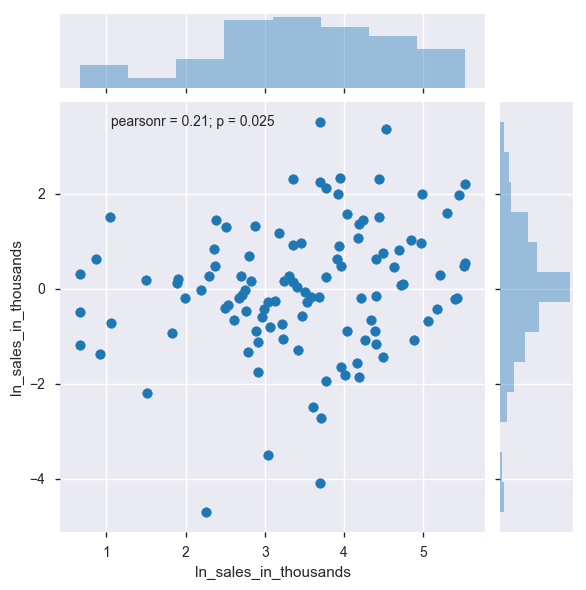

In [130]:
sns.jointplot(  train_y, residuals )

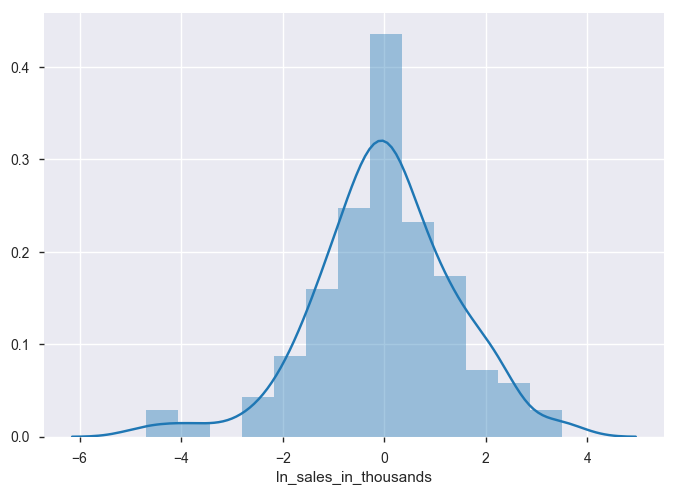

In [131]:
sns.distplot( residuals )

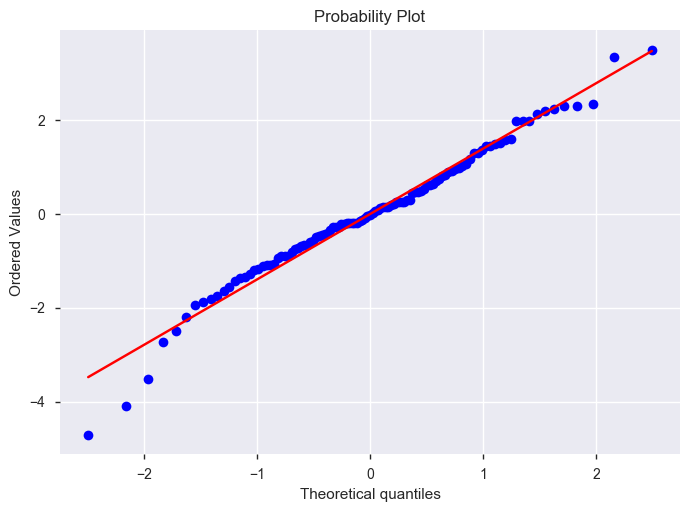

In [132]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [ ]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

In [ ]:
linreg = LinearRegression()

In [ ]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

In [ ]:
cross_val_score?

In [ ]:
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

In [ ]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [ ]:
F_values, p_values  = f_regression(  train_X, train_y )

In [ ]:
F_values

In [ ]:
['%.3f' % p for p in p_values]

As p - values are less than 5% - the variables are siginificant in the regression equation.

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions